In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.models import Sequential

In [3]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

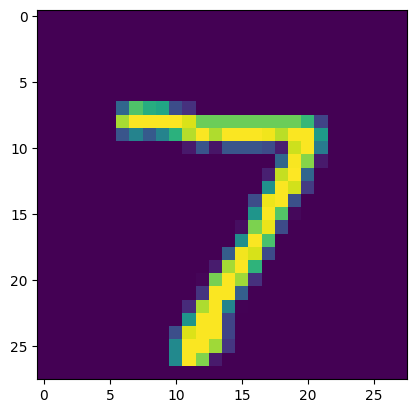

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

In [12]:
y_test[0]

7

In [44]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128 , activation = "relu"))
model.add(Dense(32 ,activation = "relu"))
model.add(Dense(10 , activation = "softmax"))


In [45]:
model.compile(loss = "sparse_categorical_crossentropy" , optimizer="Adam" , metrics=["accuracy"])

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
history = model.fit(X_train , y_train , epochs = 10 , validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 1.7303 - accuracy: 0.5587 - val_loss: 0.9586 - val_accuracy: 0.6771
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.8016 - accuracy: 0.7249 - val_loss: 0.7120 - val_accuracy: 0.7510
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5955 - accuracy: 0.7914 - val_loss: 0.5566 - val_accuracy: 0.8119
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4264 - accuracy: 0.8597 - val_loss: 0.3111 - val_accuracy: 0.9301
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2310 - accuracy: 0.9442 - val_loss: 0.1994 - val_accuracy: 0.9543
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1641 - accuracy: 0.9586 - val_loss: 0.1863 - val_accuracy: 0.9567
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1398 - accuracy: 0.9635 - val_loss: 0.1929 - val_accuracy:

In [54]:
y_pred = np.argmax(model.predict(X_test) , axis = 1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [55]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9583

In [57]:
np.argmax(model.predict(X_test[1].reshape(1,28,28)) , axis = 1)[0]

1/1 [==============================] - 0s 52ms/step


2

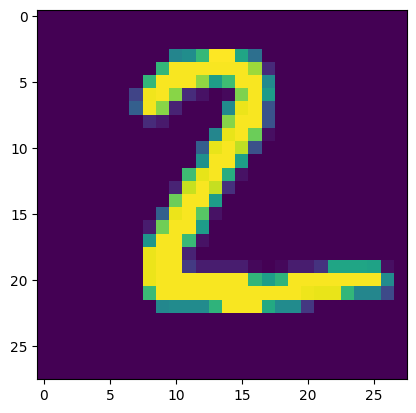

In [58]:
plt.imshow(X_test[1])

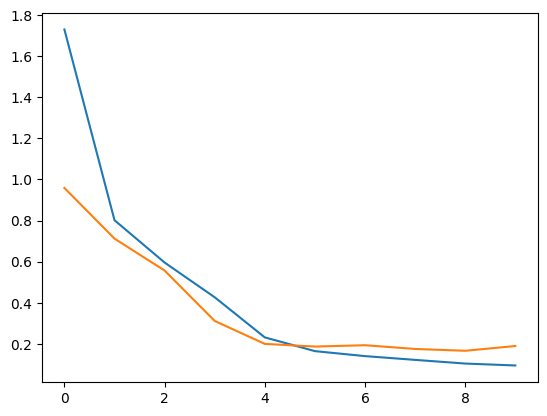

In [59]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

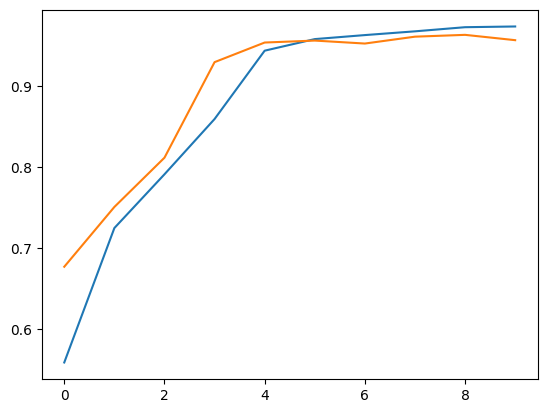

In [60]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])